### (1) 데이터 가져오기

In [5]:
# data preparation

import pandas as pd
import seaborn as sns

file_path = "bike-sharing-demand/train.csv"
train = pd.read_csv(file_path)

train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [8]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [9]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [10]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [6]:
# datetime 컬럼 형식 바꾸기

In [11]:
train['datetime'] = pd.to_datetime(train['datetime'])

train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
train['minute'] = pd.DatetimeIndex(train['datetime']).minute
train['second'] = pd.DatetimeIndex(train['datetime']).second

train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,0,0


### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

/Users/Jinmi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


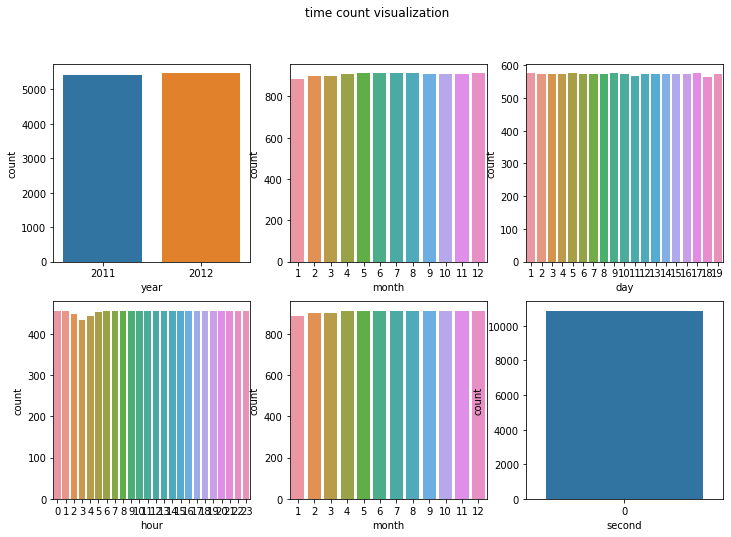

In [12]:
# seaborn 불러오기
import seaborn as sns
#matplotlib 불러오기
from matplotlib import pyplot as plt

#plt.subplots함수로 "도화지(figure)" 및 "축(axis)" 그리기 
fig, axes = plt.subplots(2,3, figsize=(12,8))
axes = axes.flatten()

# 그래프 제목 정하기 
fig.suptitle('time count visualization')

#sns.countplot함수를 이용하여 그래프 그리기
sns.countplot(train['year'], ax=axes[0])
sns.countplot(train['month'], ax=axes[1])
sns.countplot(train['day'], ax=axes[2])
sns.countplot(train['hour'], ax=axes[3])
sns.countplot(train['month'], ax=axes[4])
sns.countplot(train['second'], ax=axes[5])


fig.show()

### (4) X, y 컬럼 선택 및 train/test 데이터 분리

- X에는 문자열 데이터, 쓸모없는 데이터를 제외한 컬럼의 데이터 넣기
- count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [15]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
year                   int64
month                  int64
day                    int64
hour                   int64
minute                 int64
second                 int64
dtype: object

In [16]:
X = train.drop(columns=['datetime','count'], axis=1)

y = train['count']

In [17]:
X

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,2012,12,19,19,0,0
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,2012,12,19,20,0,0
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,2012,12,19,21,0,0
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,2012,12,19,22,0,0


In [19]:
from sklearn.model_selection import train_test_split

#sklearn.model_selection의 train_test_split함수를 사용하여 8:2 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=7)

print("X_train number :", len(X_train))
print("X_test number :", len(X_test))

X_train number : 8708
X_test number : 2178


### (5) LinearRegression 모델 학습

In [21]:
from sklearn.linear_model import LinearRegression
#선형회귀 모델 생성
reg = LinearRegression()

#테스트 데이터로 학습
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [24]:
#reg모델로 X_test 예측
y_pred = reg.predict(X_test)
print(y_pred)

#sklearn.metrics의 mean_squared_error 함수로 MSE와 RSME 계산
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred) # MSE
RMSE = MSE **0.5 # RMSE

print(MSE)
print(RMSE)

[285. 138. 215. ...  58.  76.   4.]
1.126297183935458e-24
1.061271493980432e-12


### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

In [30]:
X_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,minute,second
3502,3,0,1,1,27.06,31.060,74,8.9981,45,240,2011,8,15,20,0,0
6462,1,0,1,1,10.66,13.635,41,7.0015,9,129,2012,3,6,12,0,0
3275,3,0,0,1,30.34,34.850,70,15.0013,60,155,2011,8,6,9,0,0
3503,3,0,1,1,27.06,31.060,65,12.9980,34,150,2011,8,15,21,0,0
6813,2,0,1,1,16.40,20.455,76,32.9975,2,22,2012,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8674,3,0,1,2,32.80,39.395,63,15.0013,81,388,2012,8,3,19,0,0
8764,3,0,1,2,32.80,37.120,52,12.9980,68,185,2012,8,7,13,0,0
3760,3,0,1,3,25.42,27.275,94,7.0015,3,55,2011,9,7,15,0,0
39,1,0,0,3,13.94,16.665,71,11.0014,9,67,2011,1,2,16,0,0


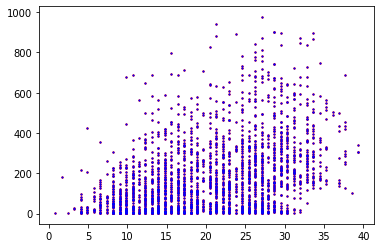

In [32]:
#matplolib의 scatter plot 으로 시각화 
#x축에 X 데이터 중 `temp` 데이터를, y축에는 count 데이터를 넣어서 시각화하기
plt.scatter(x=X_test['temp'], y=y_pred, color='red', s = 2)
plt.scatter(x=X_test['temp'], y=y_test, color='blue', s = 1.1)

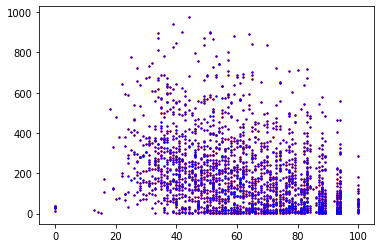

In [33]:
# x축에 X 데이터 중 `humidity` 데이터를, y축에는 count 데이터를 넣어서 시각화하기
plt.scatter(X_test['humidity'], y_pred,  color='red', s = 2)
plt.scatter(X_test['humidity'], y_test,  color='blue', s = 1.1)